In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from malib.train import train

import matplotlib.pyplot as plt

In [2]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np

class SpiralDataset(Dataset):
    def __init__(self, N, K):
        self.X, self.y = self.generate_spiral_dataset(N, K)
        
        # Convert numpy arrays to PyTorch tensors
        self.X = torch.from_numpy(self.X).float()
        self.y = torch.from_numpy(self.y).long()

    def generate_spiral_dataset(self, N, K):
        X = np.zeros((N*K, 2)) # data matrix (each row = single example)
        y = np.zeros(N*K, dtype='uint8') # class labels

        for j in range(K):
            ix = range(N*j, N*(j+1))
            r = np.linspace(0.0, 1, N) # rayon
            t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N)*0.2 # theta
            X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
            y[ix] = j

        return X, y

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

N = 100 # number of points per class
K = 3 # number of classes

spiral_dataset_train = SpiralDataset(N, K)
spiral_dataset_test = SpiralDataset(N, K)

train_loader = DataLoader(spiral_dataset_train, batch_size=3*N, shuffle=True)
test_loader = DataLoader(spiral_dataset_train, batch_size=3*N, shuffle=False)
train_loader_fixed = DataLoader(spiral_dataset_train, batch_size=3*N, shuffle=False)

In [3]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()

        self.fc1 = nn.Linear(2, 10)
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, 3)

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        
        return x

In [4]:
model = MLP()

In [5]:
train(model, train_loader, epochs=500)

Epoch 0/500. Loss=1.110495686531067
Epoch 1/500. Loss=1.103251338005066
Epoch 2/500. Loss=1.096195936203003
Epoch 3/500. Loss=1.0896958112716675
Epoch 4/500. Loss=1.083599328994751
Epoch 5/500. Loss=1.0775327682495117
Epoch 6/500. Loss=1.0713768005371094
Epoch 7/500. Loss=1.0650256872177124
Epoch 8/500. Loss=1.0583399534225464
Epoch 9/500. Loss=1.0509059429168701
Epoch 10/500. Loss=1.042466163635254
Epoch 11/500. Loss=1.03291654586792
Epoch 12/500. Loss=1.0223371982574463
Epoch 13/500. Loss=1.0108269453048706
Epoch 14/500. Loss=0.9984528422355652
Epoch 15/500. Loss=0.9853146076202393
Epoch 16/500. Loss=0.9713736176490784
Epoch 17/500. Loss=0.9566942453384399
Epoch 18/500. Loss=0.9414844512939453
Epoch 19/500. Loss=0.9258984327316284
Epoch 20/500. Loss=0.9100967645645142
Epoch 21/500. Loss=0.8942092657089233
Epoch 22/500. Loss=0.8783679008483887
Epoch 23/500. Loss=0.8627288937568665
Epoch 24/500. Loss=0.847545862197876
Epoch 25/500. Loss=0.8328901529312134
Epoch 26/500. Loss=0.818846642

In [6]:
from malib.compute_loss import compute_loss

In [7]:
compute_loss(model, train_loader_fixed, num_batches=8)

0.023167680948972702

In [8]:
from malib.create_landscape import create_1D_losscape

1966.80078125
1218.5635986328125
1056.37158203125
886.2178955078125
469.2355651855469
775.0873413085938
1540.1544189453125
2526.733642578125
3872.912841796875
5953.28857421875


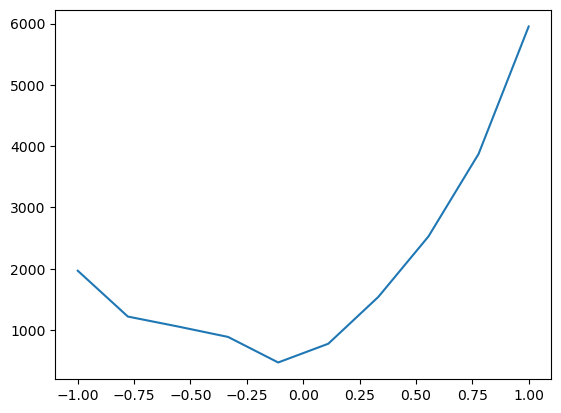

In [14]:
create_1D_losscape(model, train_loader_fixed)